<a href="https://colab.research.google.com/github/RafaGusmao/Data-Science---Health-Insurance-Cost-Prediction-with-Pycaret/blob/main/Health_Insurance_Cost_Prediction_with_Pycaret_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Insurance Cost Prediction**

Health insurance is a type of medical assistance that offers a series of coverages to the insured person, who pays a monthly fee or takes out a policy. Coverages may include:
Medical consultations, Exams, Clinical analyses, Hospitalizations, Surgeries, Births, Treatments, Dental procedures.
When the insured needs to use the coverage, he pays for the medical care and requests reimbursement from the insurer.
Health insurance can offer additional coverage, such as for pregnant women, newborns and dental.
The main difference between health insurance and health plan is that in insurance, the policy amount is generally low, while in health plan the payment is monthly.

In today's project, we will predict health insurance values, with Pycaret, using the database provided by Kaggle.

In [3]:
!pip install pycaret -q
!pip install mlflow -q

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/insurance.csv")

# Exploratory data analysis

Seeking a better understanding of the dataframe, I used Data Visualization and Exploratory Analysis techniques.

In [5]:
# First 5 entries
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#dataframe size:
df.shape

(1338, 7)

In [7]:
#describe df:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='sex', ylabel='count'>

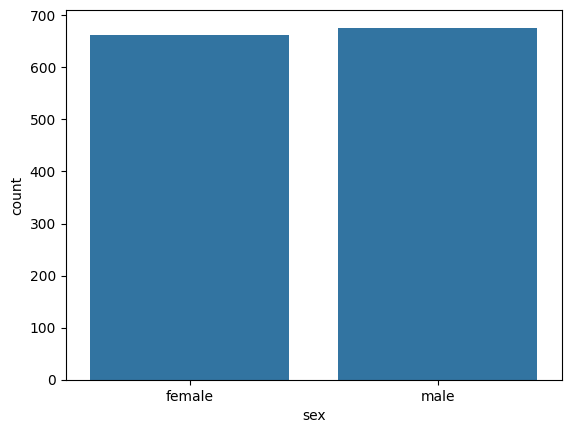

In [8]:
#gender chart:
sns.countplot(x='sex', data=df)

<Axes: xlabel='age', ylabel='Count'>

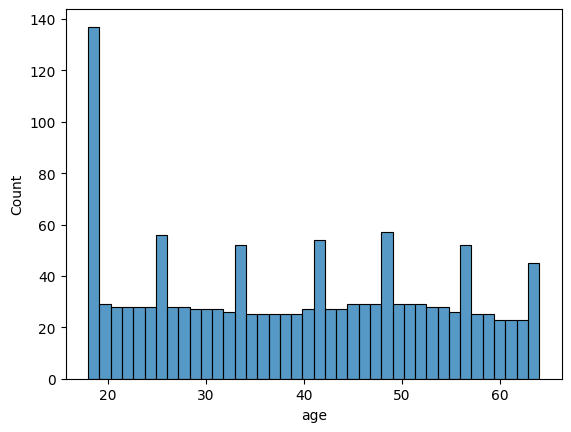

In [9]:
#age histogram:
fig, ax = plt.subplots()
sns.histplot(x='age', data=df, bins = 40)

<Axes: xlabel='smoker', ylabel='count'>

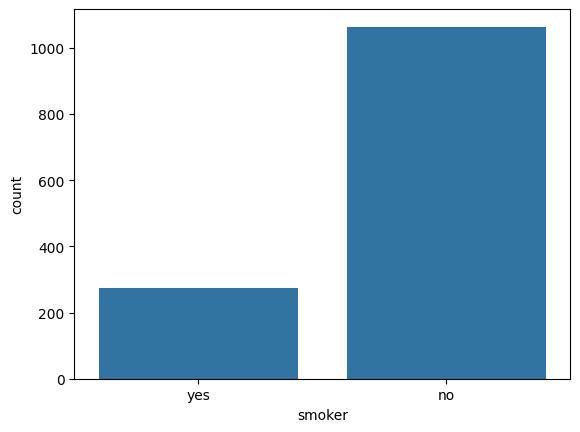

In [10]:
#smoker:
sns.countplot(x='smoker', data=df)

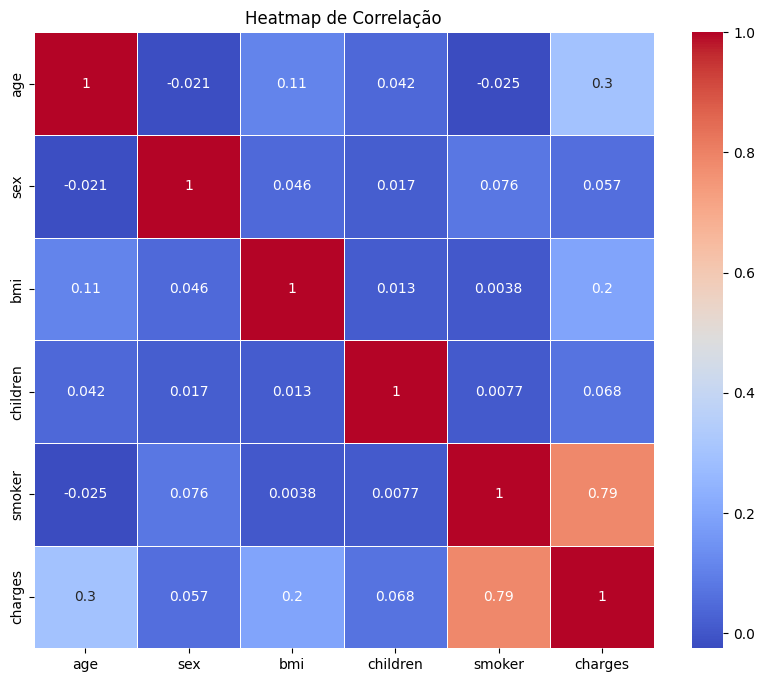

In [11]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Coding the 'sex' column and 'smoker':
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])

# Calculating the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

We can observe a strong correlation between the value of health insurance, represented by the "Charges" column, and customers who are smokers, represented by the "smoker" column, as expected, probably customers who are smokers have an insurance value of greater health than those who are not. In addition to this metric, it is also worth highlighting the age of customers, which also has a good relationship with the value of the insurance.

# Machine Learning with Pycaret

For this type of project, I will use regression models. In particular the Gradient Boosting Regressor. Because it presents better results compared to the others. In addition to being ideal for forecasting models.


In [12]:
#separate between training and testing:
test = df.sample (frac=0.10)
train = df.drop(test.index)

test.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)

In [13]:
#regression with pycaret:
from pycaret.regression import *
reg = setup(data = train, target = 'charges')

,Description,Value
0,Session id,7430
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 7)"
4,Transformed data shape,"(1204, 10)"
5,Transformed train set shape,"(842, 10)"
6,Transformed test set shape,"(362, 10)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


In [14]:
#pipeline:
reg = setup(data=df, target="charges", normalize=True,log_experiment = True, experiment_name="charges_01")

,Description,Value
0,Session id,3760
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


2024/08/31 19:08:37 INFO mlflow.tracking.fluent: Experiment with name 'charges_01' does not exist. Creating a new experiment.


In [15]:
#compare models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2534.1338,20646024.8286,4481.7729,0.8527,0.4239,0.2966,0.1700
lightgbm,Light Gradient Boosting Machine,2785.9767,22503454.0203,4690.7336,0.8395,0.5110,0.3453,0.3580
rf,Random Forest Regressor,2755.1987,23705262.8735,4818.3446,0.8303,0.4651,0.3346,0.4530
ada,AdaBoost Regressor,3935.3767,25932901.0440,5053.1940,0.8145,0.5756,0.6133,0.0920
xgboost,Extreme Gradient Boosting,3017.0341,26217816.8000,5077.8557,0.8141,0.5186,0.3720,0.1360
et,Extra Trees Regressor,2707.1640,26474523.6175,5078.9860,0.8086,0.4709,0.3257,0.5360
knn,K Neighbors Regressor,3553.4342,31467228.0000,5553.3500,0.7763,0.4766,0.3682,0.0720
br,Bayesian Ridge,4300.6574,36511711.6167,6023.5938,0.7422,0.5587,0.4361,0.0640
llar,Lasso Least Angle Regression,4298.0515,36511057.7932,6023.5074,0.7422,0.5624,0.4357,0.0690
ridge,Ridge Regression,4299.2467,36511292.0244,6023.5427,0.7422,0.5602,0.4359,0.1200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2024/08/31 19:09:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/08/31 19:09:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/08/31 19:09:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/08/31 19:09:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/08/31 19:09:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/08/31 19:09:29 

In [16]:
# best model:
print(best)

GradientBoostingRegressor(random_state=3760)


In [17]:
#instantiating the model:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2686.0005,22366826.8614,4729.3580,0.8074,0.4709,0.3144
1,2881.1551,23209166.1144,4817.5892,0.8460,0.4413,0.2917
2,2868.0070,24086078.2012,4907.7569,0.7872,0.4069,0.3214
3,1991.7551,9922342.9244,3149.9751,0.9275,0.3834,0.3007
4,2871.2866,25847444.9389,5084.0383,0.8256,0.3914,0.2757
5,2987.3076,26889022.0281,5185.4626,0.8161,0.4255,0.2696
6,2559.2510,26240443.4158,5122.5427,0.8253,0.4620,0.2541
7,1740.1023,10644477.5395,3262.5876,0.9468,0.3782,0.2838
8,2600.3916,23435132.5604,4840.9847,0.8602,0.4874,0.3410


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/08/31 19:09:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [18]:
#tuning the model:
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2619.2872,21657355.4675,4653.7464,0.8136,0.4909,0.3115
1,2906.8761,23194009.2289,4816.0159,0.8461,0.4395,0.2738
2,3046.3622,25436326.6247,5043.4439,0.7752,0.4530,0.3673
3,2018.1665,10397189.9120,3224.4674,0.9240,0.3547,0.2821
4,2798.2452,23925978.3761,4891.4189,0.8385,0.4071,0.2968
5,3196.4920,27731698.2024,5266.0895,0.8103,0.4544,0.2978
6,2774.0753,27824520.2355,5274.8953,0.8147,0.4564,0.2550
7,1971.0964,11425131.6638,3380.1082,0.9429,0.3863,0.3040
8,2679.5683,22700918.8314,4764.5481,0.8646,0.4927,0.3373


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2024/08/31 19:10:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


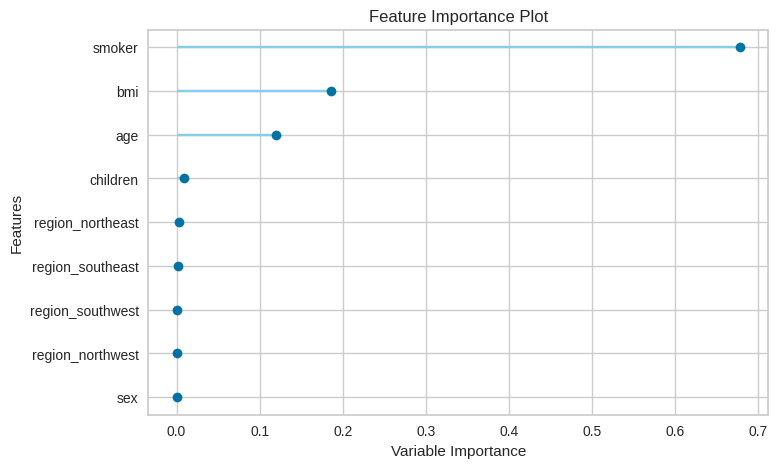

In [19]:
#plot of model:
plot_model(tuned_gbr, plot="feature")

In [20]:
#finishing the model:
final_gbr = finalize_model(tuned_gbr)

2024/08/31 19:10:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [21]:
#evaluating the model:
evaluate_model (final_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
#analyzing the changes:
predict_model(final_gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.9167,16860476.4297,4106.1510,0.8860,0.3461,0.2471


,age,sex,bmi,children,smoker,region,charges,prediction_label
322,34,1,30.799999,0,1,southwest,35491.640625,38038.586483
1133,52,0,18.334999,0,0,northwest,9991.038086,11445.257294
137,22,1,25.174999,0,0,northwest,2045.685303,2293.966385
739,29,1,35.500000,2,1,southwest,44585.457031,39775.535900
1024,47,0,45.320000,1,0,southeast,8569.861328,9550.052867
...,...,...,...,...,...,...,...,...
1034,61,1,38.380001,0,0,northwest,12950.071289,14016.429602
145,29,0,38.830002,3,0,southeast,5138.256836,6255.556691
441,33,0,33.500000,0,1,southwest,37079.371094,38321.961914
902,26,1,27.264999,3,0,northeast,4661.286133,6489.595447


In [23]:
#prediction on unseen data:
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1494.8622,5440823.1211,2332.5572,0.9707,0.2691,0.2225


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,46,1,30.495001,3,1,northwest,40720.550781,41798.814191
1,64,0,31.825001,2,0,northeast,16069.084961,17155.878305
2,21,0,22.135000,0,0,northeast,2585.850586,2795.027683
3,38,1,16.815001,2,0,northeast,6640.544922,6805.685574
4,34,1,42.130001,2,0,southeast,5124.188477,6783.016530


# Conclusion


Using the Gradient Boosting Regressor, it was possible to predict health insurance values ​​more accurately.

Insurance values, according to this database, are calculated taking into account, mainly, age and whether the client is a smoker or not. Although the database is leaner, it is still possible to have an idea of ​​the amounts to be charged. Possibly, this is a database from a small company, in a large company, one would imagine that it would have more information to be taken into account, such as genetics and family history.